<a href="https://colab.research.google.com/github/ChangED1122/Python/blob/main/SVD_of_lion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy
from PIL import Image

In [ ]:
def openImage(imagePath):
    imOrig = Image.open(imagePath)
    im = numpy.array(imOrig)

    aRed = im[:, :, 0]
    aGreen = im[:, :, 1]
    aBlue = im[:, :, 2]

    return [aRed, aGreen, aBlue, imOrig]
    
def compressSingleChannel(channelDataMatrix, singularValuesLimit):
    uChannel, sChannel, vhChannel = numpy.linalg.svd(channelDataMatrix)
    aChannelCompressed = numpy.zeros((channelDataMatrix.shape[0], channelDataMatrix.shape[1]))
    k = singularValuesLimit

    leftSide = numpy.matmul(uChannel[:, 0:k], numpy.diag(sChannel)[0:k, 0:k])
    aChannelCompressedInner = numpy.matmul(leftSide, vhChannel[0:k, :])
    aChannelCompressed = aChannelCompressedInner.astype('uint8')
    return aChannelCompressed

In [ ]:
print('*** Image Compression using SVD - a demo')
aRed, aGreen, aBlue, originalImage = openImage("/content/lion.jpeg")

*** Image Compression using SVD - a demo


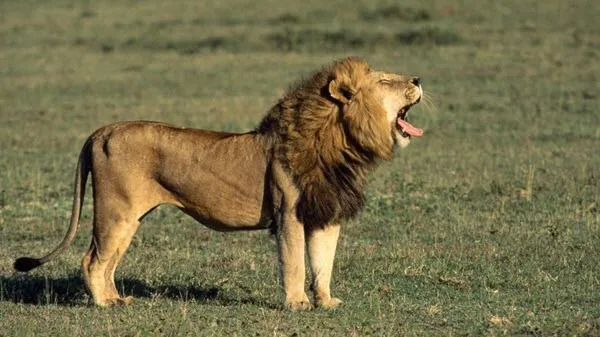

In [ ]:
lion = Image.open('/content/lion.jpeg')
lion

In [ ]:
lion.size
imageWidth = 600
imageHeight = 337

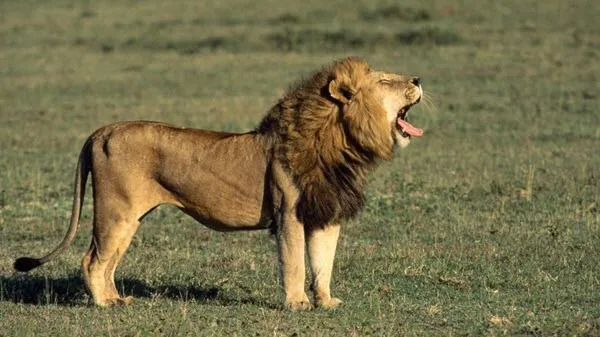

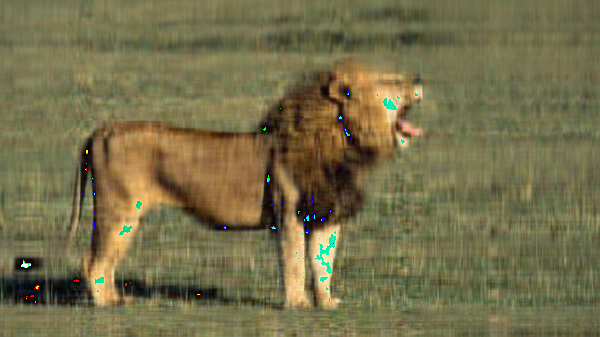

In [ ]:
singularValuesLimit = 20 #rank

aRedCompressed = compressSingleChannel(aRed, singularValuesLimit)
aGreenCompressed = compressSingleChannel(aGreen, singularValuesLimit)
aBlueCompressed = compressSingleChannel(aBlue, singularValuesLimit)

imr = Image.fromarray(aRedCompressed, mode=None)
img = Image.fromarray(aGreenCompressed, mode=None)
imb = Image.fromarray(aBlueCompressed, mode=None)

newImage = Image.merge("RGB", (imr, img, imb))

originalImage.show()
newImage.show()